In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/data/main/titanic_train.csv')
df_cmp = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/data/main/titanic_test.csv')


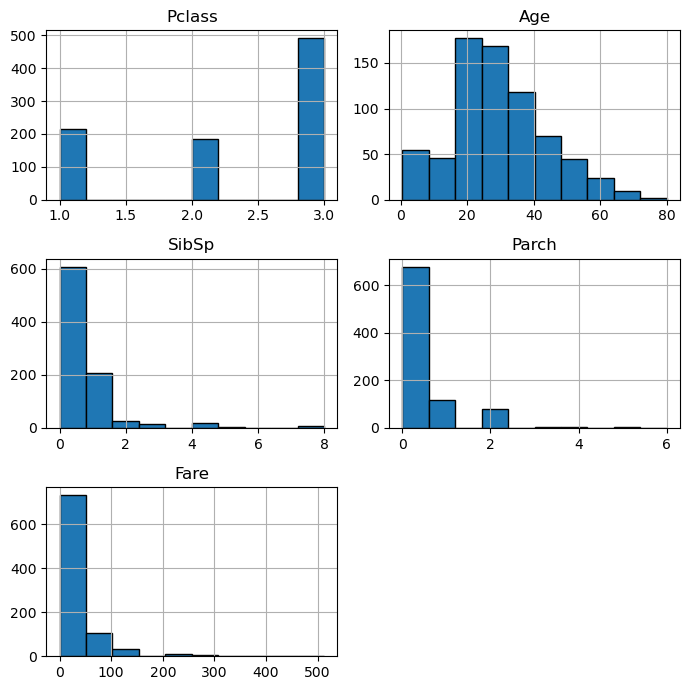

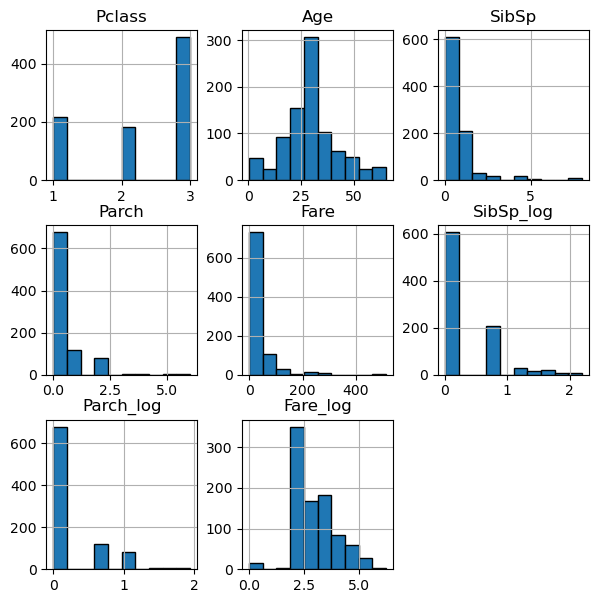

In [4]:
ids_cmp = df_cmp['PassengerId']

df = df_train.copy()
cat_feats = ['Pclass', 'Sex', 'Embarked', 'Cabin']

df.select_dtypes('number').drop(['PassengerId', 'Survived'], axis=1).hist(figsize=(7,7), ec='k')
plt.tight_layout()
plt.show()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'] = df['Age'].clip(upper=65) # 99% of the sample set is younger than 65

# These columns look to be exponential
log_transforms = ['SibSp', 'Parch', 'Fare']
df_logs = df[log_transforms].apply(np.log1p)
df_logs.columns = [c+'_log' for c in df_logs.columns]
df.loc[:, df_logs.columns] = df_logs

df.select_dtypes('number').drop(['PassengerId', 'Survived'], axis=1).hist(figsize=(7,7), ec='k')
plt.show()

In [5]:
# We tokenize the name and ticket
tokenizer_nm = tf.keras.preprocessing.text.Tokenizer(oov_token='<oov>', char_level=True)
tokenizer_nm.fit_on_texts(df['Name'])

word_idx_nm = tokenizer_nm.index_word
display(word_idx_nm)

tokenizer_tk = tf.keras.preprocessing.text.Tokenizer(oov_token='<oov>', char_level=True)
tokenizer_tk.fit_on_texts(df['Ticket'])
word_idx_tk = tokenizer_tk.index_word
display(word_idx_tk)

inpt_nm = tokenizer_nm.texts_to_sequences(df['Name'])
inpt_tk = tokenizer_tk.texts_to_sequences(df['Ticket'])

vocab_len_nm = len(word_idx_nm)
vocab_len_tk = len(word_idx_tk)

max_len_nm = max([len(seq) for seq in inpt_nm])
max_len_tk = max([len(seq) for seq in inpt_tk])

display((vocab_len_nm, vocab_len_tk), (max_len_nm, max_len_tk))

inpt_nm = tf.keras.utils.pad_sequences(inpt_nm)
inpt_tk = tf.keras.utils.pad_sequences(inpt_tk)


{1: '<oov>',
 2: ' ',
 3: 'r',
 4: 'a',
 5: 'e',
 6: 'm',
 7: 's',
 8: 'n',
 9: 'i',
 10: 'l',
 11: 'o',
 12: '.',
 13: ',',
 14: 't',
 15: 'h',
 16: 'd',
 17: 'c',
 18: 'g',
 19: 'u',
 20: 'b',
 21: 'k',
 22: 'y',
 23: 'f',
 24: 'j',
 25: 'w',
 26: 'p',
 27: 'v',
 28: '(',
 29: ')',
 30: '"',
 31: 'z',
 32: 'x',
 33: '-',
 34: 'q',
 35: "'",
 36: '/'}

{1: '<oov>',
 2: '3',
 3: '1',
 4: '2',
 5: '7',
 6: '4',
 7: '6',
 8: '0',
 9: '5',
 10: '9',
 11: '8',
 12: ' ',
 13: '.',
 14: 'c',
 15: 'o',
 16: '/',
 17: 'p',
 18: 'a',
 19: 's',
 20: 'n',
 21: 't',
 22: 'w',
 23: 'i',
 24: 'q',
 25: 'r',
 26: 'e',
 27: 'f',
 28: 'l',
 29: 'h',
 30: 'b'}

(36, 30)

(82, 18)

In [8]:
pd.get_dummies(df, columns=cat_feats)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,SibSp_log,Parch_log,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.693147,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.693147,0.000000,...,False,False,False,False,False,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.693147,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0.693147,1.098612,...,False,False,False,False,False,False,False,False,False,False
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
